In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.evaluation.SilhouetteScore import *
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans
from interClusLib.metric import *

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          7.380649        57.342040        47.050660        73.496286   
1         90.041270        92.680849        89.740398        89.865804   
2          9.291425        45.857802        37.319244        95.903477   
3         34.724165        83.411709        30.510554        84.840905   
4         29.520774        46.333538        14.882029        63.316817   
5          3.040017        29.619389         9.385487        50.287697   
6          0.141398        66.440177         4.956826        86.369551   
7         25.489963        26.644833        14.494198        16.382502   
8         57.878924        96.138572        51.002151        87.980064   
9         20.600145        24.259644        26.334284        95.727671   
10        13.112397        37.326063        58.541215        65.223

In [2]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[2 1 2 2 0 0 2 0 0 0 0 3 2 0 0 0 3 2 3 0 3 0 0 0 0 2 3 0 1 2]
0.14346427448191595


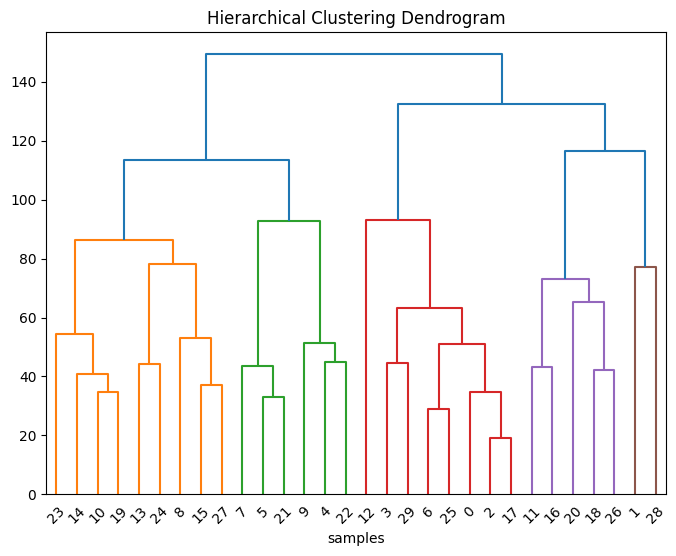

In [3]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.09212411, 0.48179667, 0.16738569, 0.25869352],
       [0.41947387, 0.26285049, 0.15225992, 0.16541572],
       [0.05077406, 0.76051028, 0.10766946, 0.0810462 ],
       [0.22290694, 0.62617325, 0.07462729, 0.07629252],
       [0.16416785, 0.19962313, 0.54666646, 0.08954255],
       [0.05235673, 0.07217631, 0.81812144, 0.05734551],
       [0.13335087, 0.44988137, 0.2326636 , 0.18410416],
       [0.11504301, 0.11007302, 0.61248534, 0.16239864],
       [0.37304574, 0.14840969, 0.10196384, 0.37658073],
       [0.13467383, 0.33431008, 0.36686663, 0.16414947],
       [0.07617783, 0.1129594 , 0.21190722, 0.59895555],
       [0.51701696, 0.15231596, 0.17855778, 0.15210931],
       [0.26536559, 0.3201204 , 0.25440141, 0.1601126 ],
       [0.09449832, 0.18350488, 0.17442702, 0.54756978],
       [0.1012774 , 0.14439588, 0.24209563, 0.51223109],
       [0.11131243, 0.09953945, 0.10063823, 0.68850989],
       [0.39372261, 0.22797452, 0.16661231, 0.21169056],
       [0.04416404, 0.77745878,

In [5]:
model.get_crisp_assignments()

print(silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

0.22709636391571728


In [6]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [7]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som.topographic_error(random_data.get_intervals())


Neuron (0, 1) has these sample indices => [0, 2, 4, 6, 17, 22, 25, 28]
Neuron (1, 1) has these sample indices => [1, 3, 8, 11, 12, 18, 20, 26, 29]
Neuron (0, 0) has these sample indices => [5, 7, 9, 10, 13, 14, 19, 21, 23, 24]
Neuron (1, 0) has these sample indices => [15, 16, 27]


0.0

In [8]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [9]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som_2.topographic_error(random_data.get_intervals())

Neuron (0, 0) has these sample indices => [0, 5, 7, 10, 13, 21, 23, 24]
Neuron (1, 1) has these sample indices => [1, 3, 8, 11, 12, 16, 18, 20, 26, 28, 29]
Neuron (1, 0) has these sample indices => [2, 4, 6, 9, 17, 22, 25]
Neuron (0, 1) has these sample indices => [14, 15, 19, 27]


0.0